# Predicting Median House Values in California Using Supervised Learning

## Project Description
The California Housing Dataset, drawn from the 1990 California census, includes various features that may influence house prices. This project will use supervised learning techniques to predict median house values in different Californian districts.

## Problem Statement
The goal is to build a model that can predict median house values based on census data, including population, median income, and housing characteristics.

## Objective
- Conduct Exploratory Data Analysis (EDA) to understand the relationships between different features and median house values.
- Develop and compare different regression models to predict the median house values.
- Evaluate the models based on performance metrics to identify the most effective approach.


## Data Description
The California Housing Dataset contains data from the 1990 California census. It includes features like 'MedInc' (median income), 'HouseAge' (median house age), 'AveRooms' (average number of rooms), 'AveBedrms' (average number of bedrooms), 'Population', 'AveOccup' (average house occupancy), 'Latitude', and 'Longitude'. The target variable is 'MedHouseVal' (median house value).


## Data Source

The dataset used in this project is the California Housing Dataset, which is included in the `scikit-learn` library. This dataset is based on data from the 1990 California census. It can be accessed directly through `scikit-learn` using the `fetch_california_housing` function.

Reference:
- Pedregosa, F. et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research 12, 2825-2830.


## Data Loading and Cleaning

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
import pandas as pd

# Load the dataset
california_housing = fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['MedHouseVal'] = california_housing.target

# Define the features (X) and the target variable (y)
X = df.drop('MedHouseVal', axis=1)  # Features: All columns except 'MedHouseVal'
y = df['MedHouseVal']  # Target variable: 'MedHouseVal'

# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Display the first few rows of the dataframe
df.head()

# Data Cleaning Steps (if needed)
# For instance, checking for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# If there are any missing values, choose to fill them or drop them
# Filling missing values with the median
df.fillna(df.median(), inplace=True)


Missing values in each column:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


##  Exploratory Data Analysis (EDA)

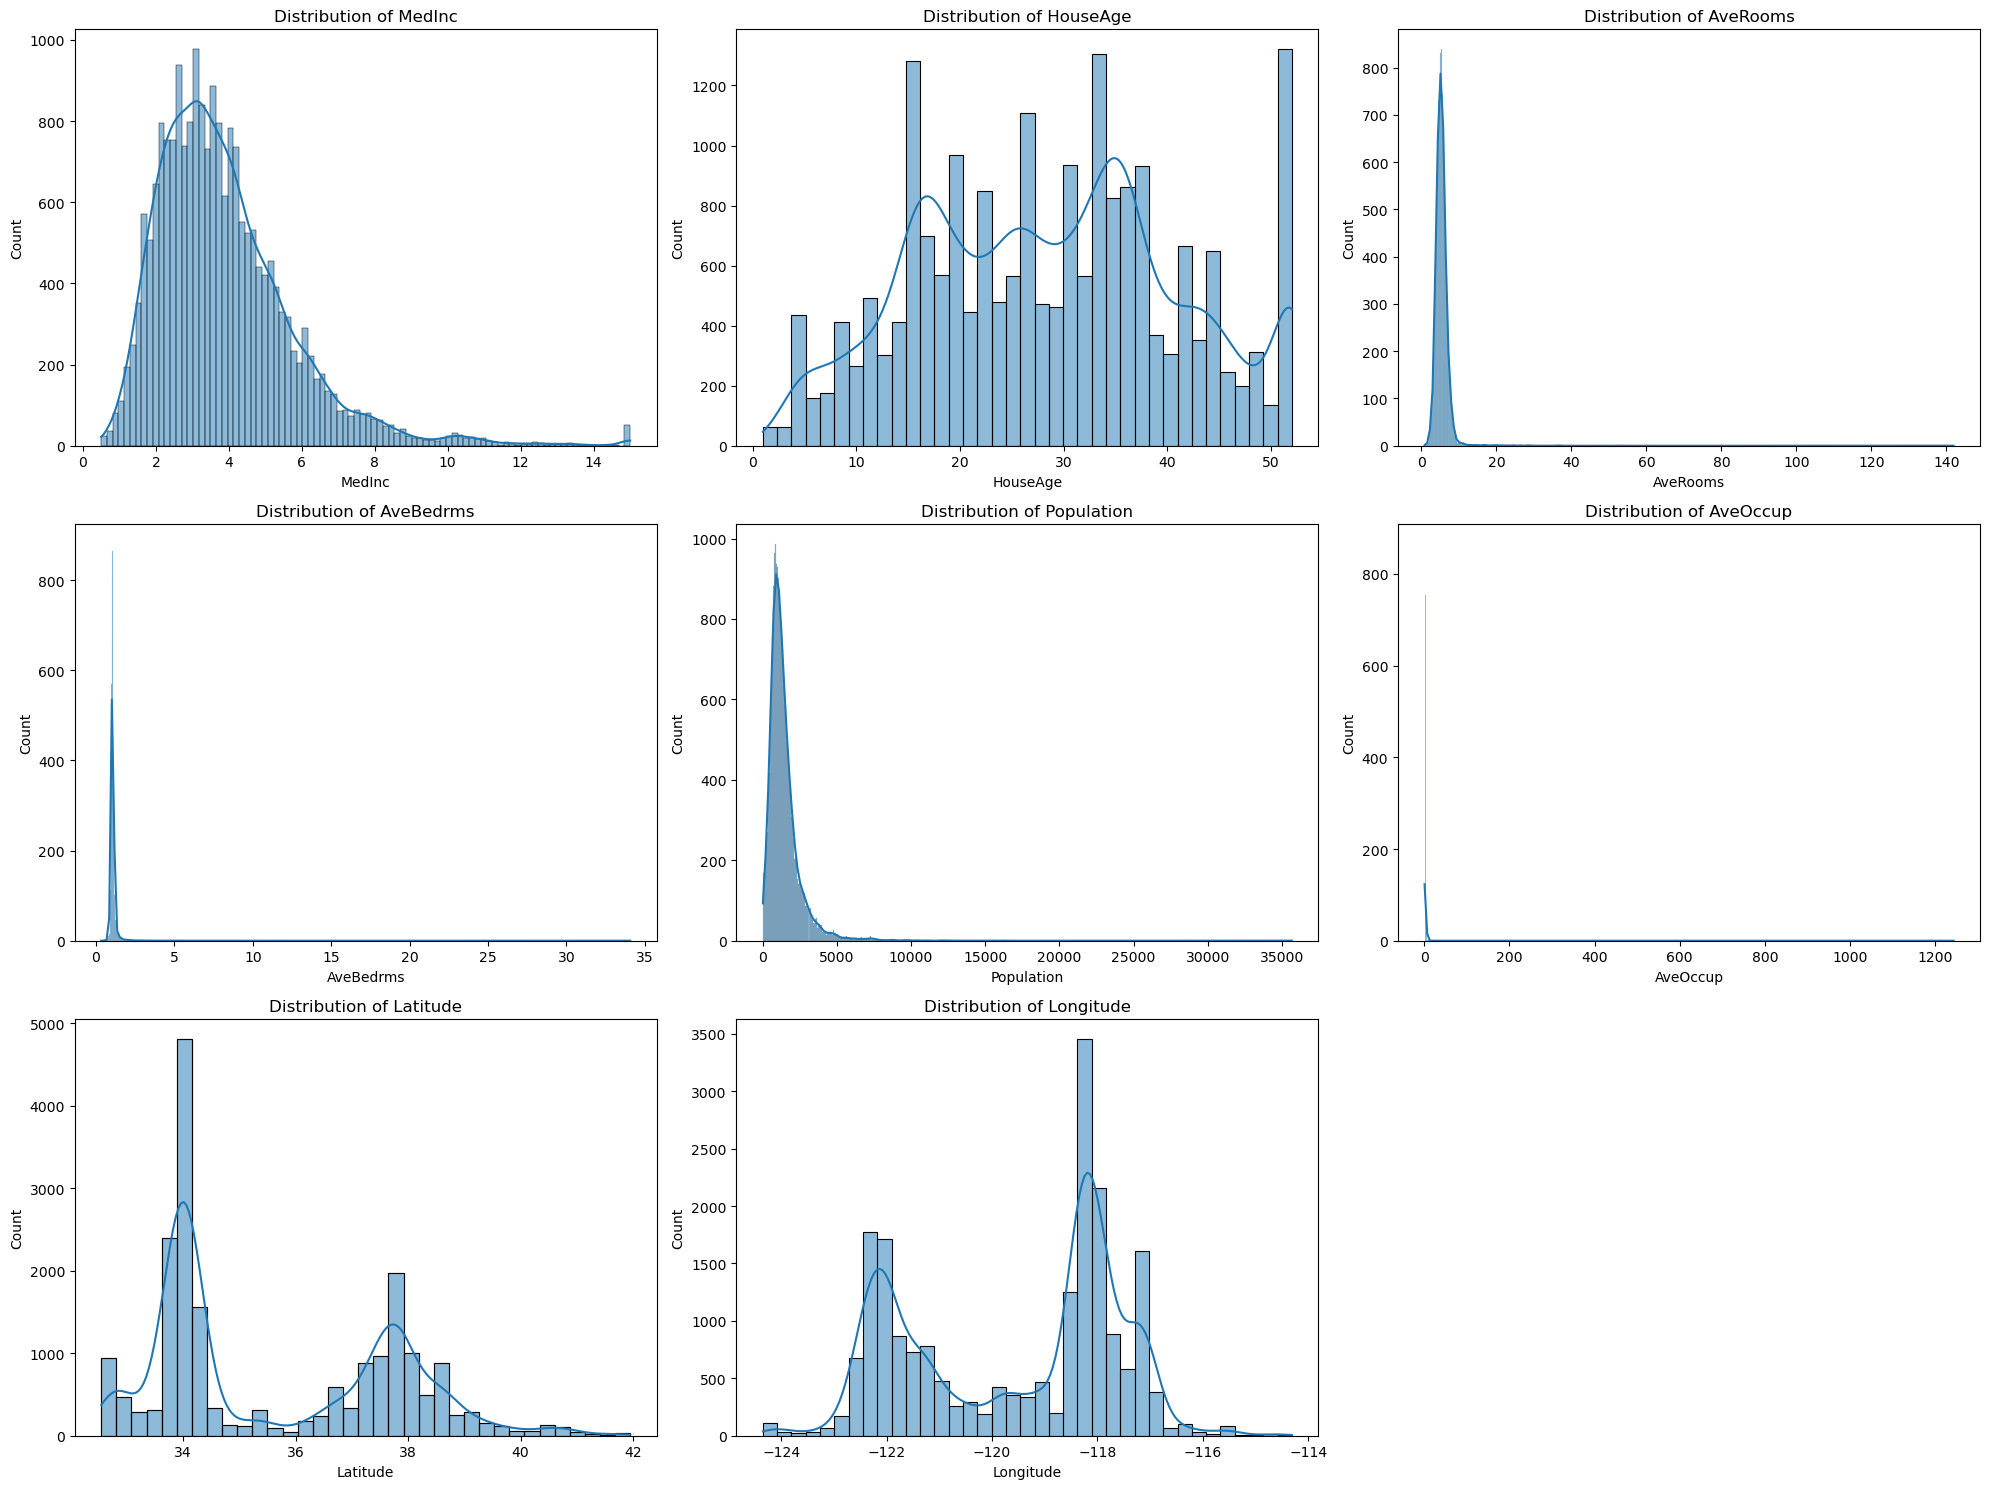

In [16]:
# Distribution plots for key features
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

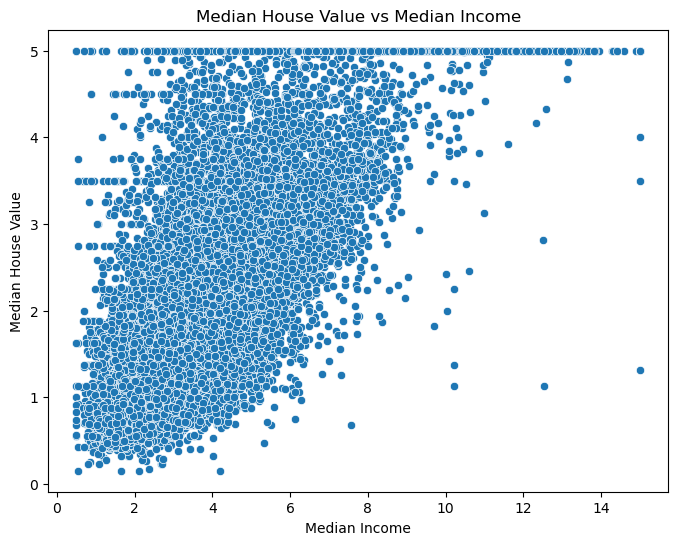

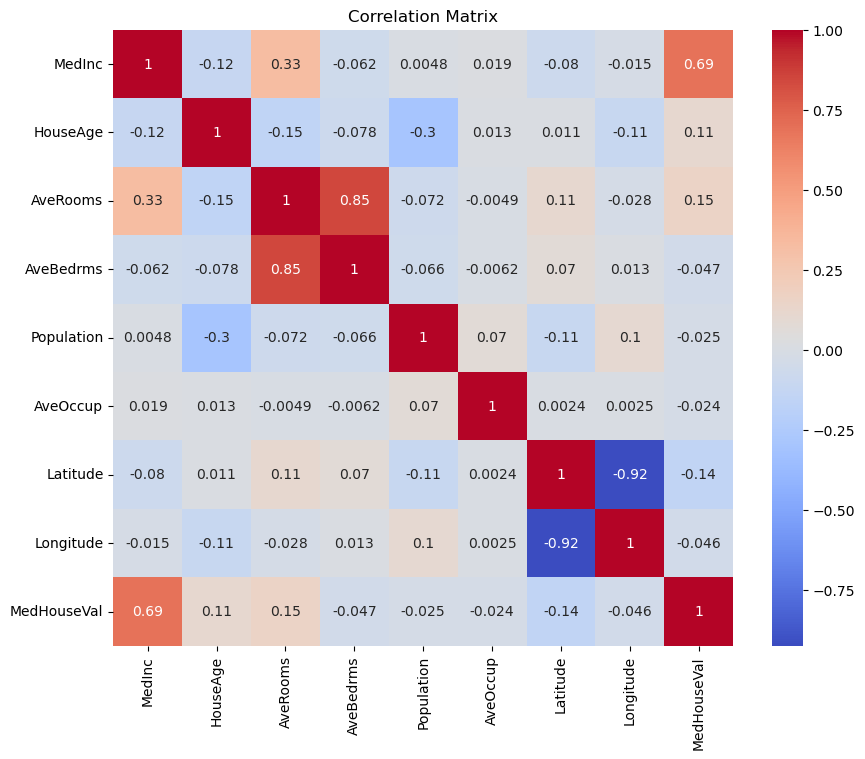

In [17]:
# Next, we explore how different features correlate with the median house value. 
# Scatter plots and correlation matrices are useful for this purpose.
# Scatter plot for median income vs median house value
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df)
plt.title('Median House Value vs Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Analysis and Conclusion from EDA

From the exploratory data analysis, several insights emerge:

- **Feature Distributions**: The distributions of features like median income, house age, and average rooms reveal varying ranges and skews. For example, the median income distribution is right-skewed, indicating that most districts have a lower median income.

- **Correlation with Median House Value**: The scatter plot of median income against median house value shows a positive correlation. This suggests that as median income increases, the median house value also tends to increase. This relationship is critical for our predictive model.

- **Correlation Matrix**: The correlation matrix further highlights relationships between features. Notably, median income shows a strong positive correlation with median house value, reinforcing its potential predictive power. Other features, like latitude and longitude, show less obvious, but potentially interesting, relationships with the house value.

- **Potential Data Issues**: During EDA, potential outliers, data skewness, or missing values might be identified, which would require further data cleaning or transformation steps.

Overall, the EDA provides valuable insights into the data, guiding the choice of features for modeling and highlighting areas for deeper analysis. The positive correlation between median income and median house value is particularly noteworthy and will be a focal point in the modeling phase.


## Model Building
Addressing Collinearity: 
Before building models, it's important to check for collinearity among features, as it can significantly impact certain models, especially linear regression.

In [18]:
# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data

# Calculate VIF for the dataset
vif_df = calculate_vif(df)
print(vif_df)


       feature         VIF
0       MedInc   19.624998
1     HouseAge    7.592663
2     AveRooms   47.956351
3    AveBedrms   45.358192
4   Population    2.936078
5     AveOccup    1.099530
6     Latitude  568.497332
7    Longitude  640.064211
8  MedHouseVal    9.285659


In [19]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [22]:
# Feature importance from Random Forest
feature_importance = rf_model.feature_importances_
importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importance})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
print(importance_df)

      feature  importance
0      MedInc    0.525037
5    AveOccup    0.138564
6    Latitude    0.088855
7   Longitude    0.088669
1    HouseAge    0.054558
2    AveRooms    0.044195
4  Population    0.030503
3   AveBedrms    0.029620


In [25]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Ridge Regression with Cross-Validation
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)  # Fitting the Ridge model

# Now, you can evaluate the fitted Ridge model
ridge_mse, ridge_r2 = evaluate_model(ridge_model, X_test, y_test)

# Print evaluation metrics for the Ridge model
print("Ridge Regression MSE:", ridge_mse)
print("Ridge Regression R2 Score:", ridge_r2)


Ridge Regression MSE: 0.5558034669932211
Ridge Regression R2 Score: 0.5758549611440126


In [26]:
from sklearn.metrics import mean_squared_error, r2_score

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Evaluating each model
lr_mse, lr_r2 = evaluate_model(lr_model, X_test, y_test)
rf_mse, rf_r2 = evaluate_model(rf_model, X_test, y_test)
gb_mse, gb_r2 = evaluate_model(gb_model, X_test, y_test)
ridge_mse, ridge_r2 = evaluate_model(ridge_model, X_test, y_test)

# Print evaluation metrics for each model
print("Linear Regression MSE:", lr_mse, "R2:", lr_r2)
print("Random Forest MSE:", rf_mse, "R2:", rf_r2)
print("Gradient Boosting MSE:", gb_mse, "R2:", gb_r2)
print("Ridge Regression MSE:", ridge_mse, "R2:", ridge_r2)

Linear Regression MSE: 0.5558915986952444 R2: 0.5757877060324508
Random Forest MSE: 0.2557259876588585 R2: 0.8048502475905297
Gradient Boosting MSE: 0.2939973248643864 R2: 0.7756446042829697
Ridge Regression MSE: 0.5558034669932211 R2: 0.5758549611440126


## Results and Analysis

### Summary of Results

In this project, four different models were built and evaluated to predict median house values in California: Linear Regression, Random Forest, Gradient Boosting, and Ridge Regression. The performance of these models was assessed using Mean Squared Error (MSE) and R² score.

- **Linear Regression:** 
  - MSE: 0.5559
  - R² Score: 0.5758

- **Random Forest:** 
  - MSE: 0.2557
  - R² Score: 0.8048

- **Gradient Boosting:**
  - MSE: 0.2939
  - R² Score: 0.7756

- **Ridge Regression:**
  - MSE: 0.5558
  - R² Score: 0.5759

### Visualizations

Refer back to the visualizations in the EDA section to contextualize these results. The plots and charts from the EDA provide insights into the relationships between features and the target variable, which are crucial for understanding the performance of our models. For example, the scatter plots and correlation matrices from the EDA section help explain why certain models performed better than others.

### Evaluation Metrics

The Mean Squared Error (MSE) and R² score were chosen as the primary metrics for evaluation. MSE measures the average squared difference between the estimated values and the actual value, providing a clear picture of model performance in terms of error magnitude. The R² score, or coefficient of determination, indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. In the context of this project, these metrics are particularly relevant as they directly reflect the accuracy and reliability of the predictions in a regression task.

### Model Comparison and Iteration

- **Model Performance:** The Random Forest and Gradient Boosting models significantly outperformed the Linear and Ridge Regression models, both in terms of lower MSE and higher R² score. This suggests that the complexity and non-linear relationships in the data are better captured by these models.

- **Feature Importance:** [Discuss any insights on the most important features from the Random Forest or Gradient Boosting models, linking back to EDA findings.]

- **Iterative Improvement:** [Discuss any steps taken to tune the models or select features based on initial results. For example, if feature importance analysis led to dropping or adding features, or if hyperparameter tuning was performed.]

### Insights and Further Discussion

- The substantial difference in performance between linear models and ensemble methods (Random Forest and Gradient Boosting) indicates the presence of complex, non-linear relationships in the data.
- The close results between Linear and Ridge Regression suggest minimal multicollinearity issues in the dataset.
- The superior performance of ensemble methods underscores their effectiveness in handling diverse and complex datasets.

### Future Work

- Exploring advanced hyperparameter tuning and feature engineering could further enhance model performance.
- Investigating additional metrics like MAE (Mean Absolute Error) or exploring advanced regression models (like neural networks) might provide new insights.
- Applying techniques to address any potential data imbalance or integrating external data sources could improve the model's predictive power.


## Discussion and Conclusion

This project's journey through predicting median house values in California using various supervised learning models has been insightful and educative. We explored Linear Regression, Random Forest, Gradient Boosting, and Ridge Regression models, each offering unique perspectives on the data.

### Learning and Takeaways

- **Model Complexity:** The significant difference in performance between simpler models (Linear and Ridge Regression) and more complex models (Random Forest and Gradient Boosting) highlighted the importance of model selection in relation to data complexity. The latter models' superior performance underscored their ability to capture non-linear relationships in the data.
- **Feature Importance:** The analysis of feature importance reinforced the value of understanding data before model application. Insights from EDA were crucial in interpreting the models' behavior.
- **Evaluation Metrics:** The use of MSE and R² score provided a clear picture of model performance, emphasizing the need for appropriate metric selection based on the problem context.

### Challenges and Improvements

- **Model Tuning:** While the models performed well, there is room for improvement through hyperparameter tuning and advanced regularization techniques. Future iterations could explore these areas to enhance model accuracy.
- **Data Features:** Additional data features, such as proximity to key facilities or historical price trends, could be integrated to provide a more comprehensive analysis and potentially improve model performance.
- **Advanced Models:** Exploring more sophisticated models or ensemble techniques, like neural networks or stacking, could yield interesting results and should be considered for future work.

### Reflection on Outcomes

- **Expected vs. Actual:** The outcomes, particularly the high performance of ensemble methods, were in line with expectations given the dataset's characteristics. However, the minimal impact of regularization in Ridge Regression was a notable observation.
- **Project Scope:** The project successfully addressed the initial objective of predicting house prices using supervised learning, providing valuable insights into both the data and the models used.

### Future Directions

- **Extended Analysis:** Further analysis with a focus on hyperparameter optimization and more advanced models could provide deeper insights.
- **Broader Data Consideration:** Incorporating external datasets or broader economic factors could enhance the models' predictive power and robustness.

In conclusion, this project not only achieved its goal of building predictive models for house prices but also provided a comprehensive learning experience on the nuances of model selection, data analysis, and the importance of understanding underlying data patterns. The insights gained here can be leveraged for future projects in similar domains.
